# Assignment 2 - Neural Networks for Classification

## Part 1 - Implementing a Neural Network with One Hidden Layer

#### Loading data and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
# import diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


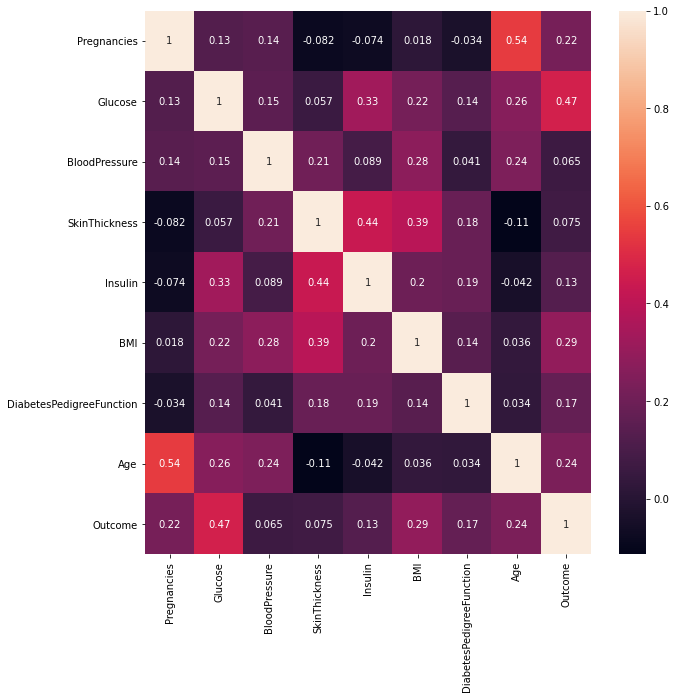

In [3]:
#Correlation Matrix - feature dependecy
corrMatrix = diabetes_df.corr()

# code for display
print(diabetes_df.shape)
plt.figure(figsize=(10,10))
corrMatrix = diabetes_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Standardization & Splitting Data to Train and Test 

In [4]:
# Handling missing values
#diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(0,diabetes_df['BloodPressure'].mean())
#diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0,diabetes_df['SkinThickness'].mean())
#diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0,diabetes_df['Insulin'].mean())


In [5]:
#Standardization
diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = StandardScaler().fit_transform(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1


In [6]:
#Splitting Data to Train and Test
X = diabetes_df.iloc[:, :-1].values
Y = diabetes_df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [7]:
# Number of rows in train and test data split

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


#### Creating the model

In [8]:
# Neural Network with One Hidden Layer.

# Creating the model.
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu', kernel_initializer='he_uniform'))  # Hidden layer.
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))  # Output layer.

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test), epochs=30, batch_size=10)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
62/62 [==============================] - 0s 4ms/step - loss: 0.6263 - accuracy: 0.6596 - val_loss: 0.5357 - val_accuracy: 0.7727
Epoch 2/30
62/62 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7476 - val_loss: 0.5093 - val_accuracy: 0.7662
Epoch 3/30
62/62 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7655 - val_loss: 0.5013 - val_accuracy: 0.7857
Epoch 4/30
62/62 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 

In [9]:
# Saving weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model_weights.h5")


#### 2. Plot the accuracy and loss

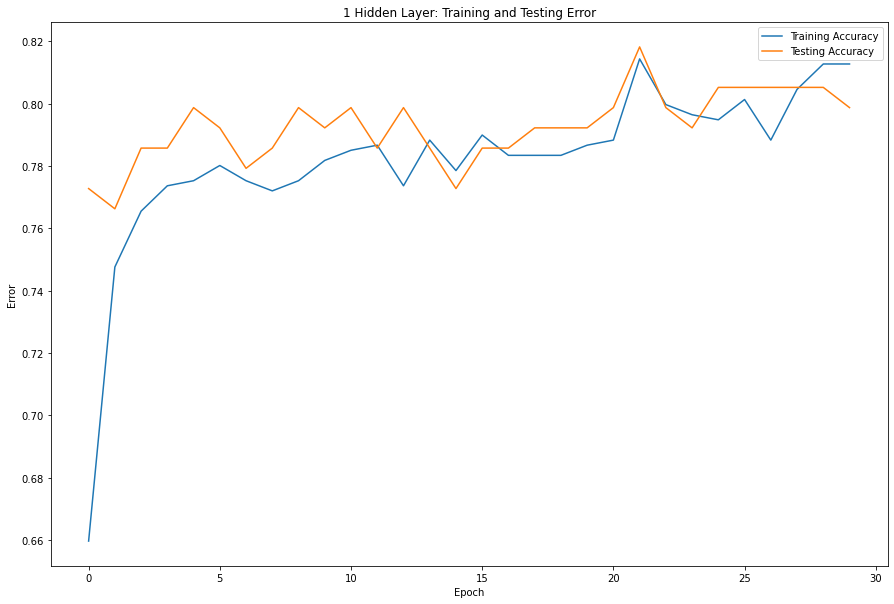

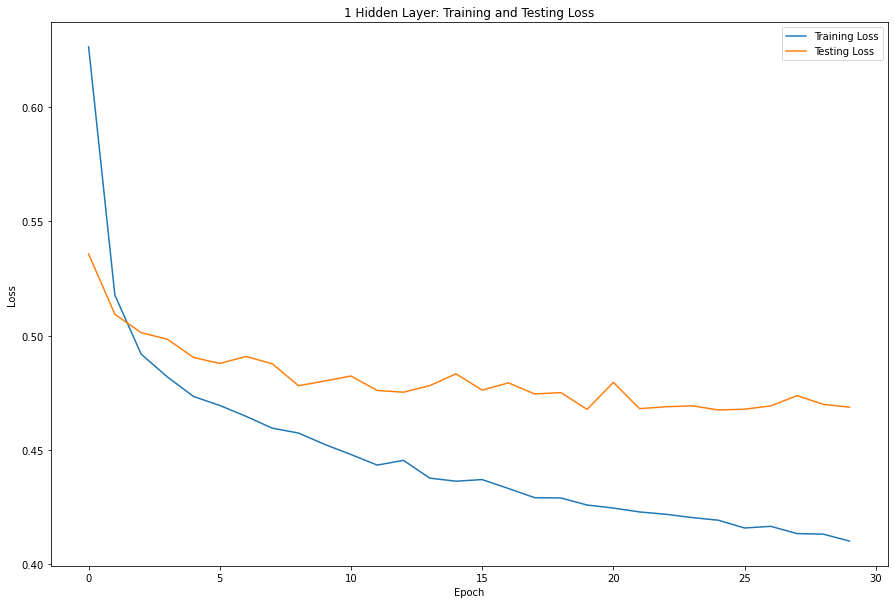

In [10]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

## Part 2 - Implementing a Neural Network with 3 Hidden Layers

#### Creating the model

In [11]:
# Neural Network with 3 Hidden Layers.
#early_stopping = EarlyStopping()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=0, min_lr=0.00001)

# Creating the model.
model3 = Sequential()
model3.add(Dense(512, input_dim=8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(l=0.01)))  # Hidden layer 1.
model3.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.01)))  # Hidden layer 2.
model3.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.01)))  # Hidden layer 3.
model3.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))  # Output layer.

model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model3.summary())

# Training the model.
history3 = model3.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test), epochs=30, batch_size=10, callbacks=[reduce_lr])

# Evaluating the model
loss3, accuracy3 = model3.evaluate(X_test, Y_test)
print('\n\n Loss', loss3, 'Accuracy:', accuracy3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 168,961
Trainable params: 168,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
62/62 [==============================] - 0s 4ms/step - loss: 13.6166 - accuracy: 0.6987 - val_loss: 11.5079 - val_accuracy: 0.8117
Epoch 2/30
62/62 [==============================] - 0s 2ms/step - loss: 10.0244 - accuracy: 0.7622 

In [12]:
# Saving weights
model3_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model3_json)
    
model3.save_weights("model3_weights.h5")


#### 2. Plot the accuracy and loss

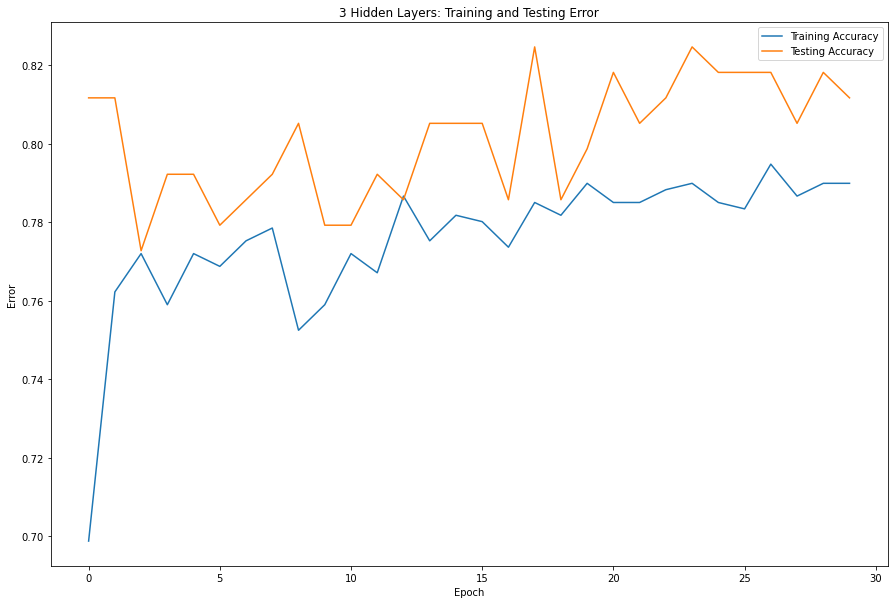

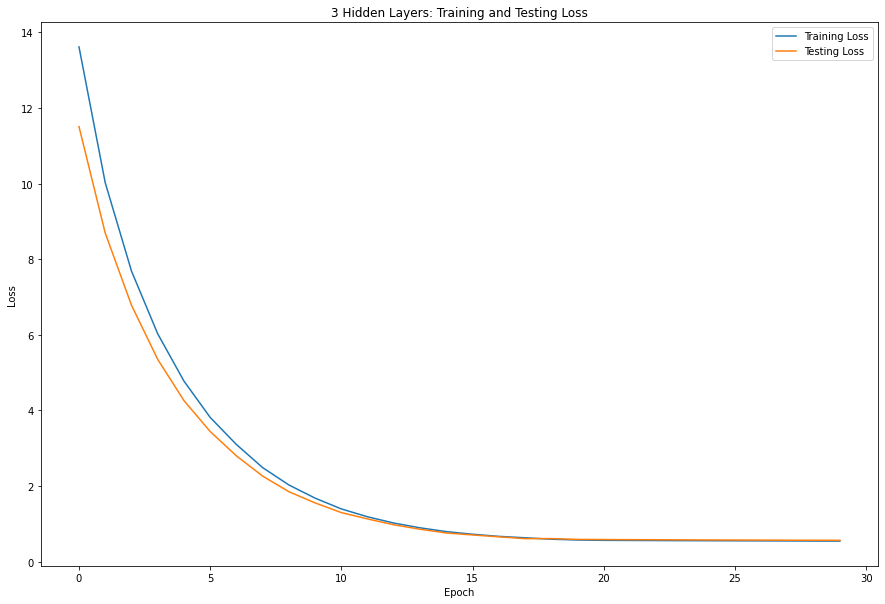

In [13]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()